## Loading + Cleaning the data

We load the corpus, but drop the header and footer so that our classifier is not sensitive to them (as is suggested by the documentation which comes with the dataset).

As a cleaning step we remove the white space characters, to simplify tokenization.

The dataset is not egregiously unbalanced in terms of classes, so accuracy is not the worst thing to optimize.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'])

In [3]:
df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
documents = df['data']
target_names = df['target_names']
targets = df['target']

In [5]:
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
idx = 209

print(documents[idx])

print(target_names[targets[idx]])





Well, pardon me for trying to continue the discussion rather than just
tugging my forelock in dismay at having not considered actually trying
to recover the energy from this process (which is at least trying to
go the 'right' way on the energy curve).  Now, where *did* I put those
sackcloth and ashes?

[I was not and am not 'pretending' anything; I am *so* pleased you are
not surprised, though.]


Note that I didn't say it was perpetual motion, or even that it
sounded like perpetual motion; the phrase was "sounds almost like
perpetual motion", which I, at least, consider a somewhat different
propposition than the one you elect to criticize.  Perhaps I should
beg your pardon for being *too* precise in my use of language?


I will believe that this process comes even close to approaching
technological and economic feasibility (given the mixed nature of the
trash that will have to be run through it as opposed to the costs of
separating things first and having a different 'run' for eac

In [7]:
# remove white space
documents = [doc.replace('\n','').replace('\t', '') for doc in documents]

defaultdict(<function <lambda> at 0x12ca32670>, {'rec.autos': 594, 'comp.sys.mac.hardware': 578, 'comp.graphics': 584, 'sci.space': 593, 'talk.politics.guns': 546, 'sci.med': 594, 'comp.sys.ibm.pc.hardware': 590, 'comp.os.ms-windows.misc': 591, 'rec.motorcycles': 598, 'talk.religion.misc': 377, 'misc.forsale': 585, 'alt.atheism': 480, 'sci.electronics': 591, 'comp.windows.x': 593, 'rec.sport.hockey': 600, 'rec.sport.baseball': 597, 'soc.religion.christian': 599, 'talk.politics.mideast': 564, 'talk.politics.misc': 465, 'sci.crypt': 595})


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'rec.autos'),
  Text(1, 0, 'comp.sys.mac.hardware'),
  Text(2, 0, 'comp.graphics'),
  Text(3, 0, 'sci.space'),
  Text(4, 0, 'talk.politics.guns'),
  Text(5, 0, 'sci.med'),
  Text(6, 0, 'comp.sys.ibm.pc.hardware'),
  Text(7, 0, 'comp.os.ms-windows.misc'),
  Text(8, 0, 'rec.motorcycles'),
  Text(9, 0, 'talk.religion.misc'),
  Text(10, 0, 'misc.forsale'),
  Text(11, 0, 'alt.atheism'),
  Text(12, 0, 'sci.electronics'),
  Text(13, 0, 'comp.windows.x'),
  Text(14, 0, 'rec.sport.hockey'),
  Text(15, 0, 'rec.sport.baseball'),
  Text(16, 0, 'soc.religion.christian'),
  Text(17, 0, 'talk.politics.mideast'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'sci.crypt')])

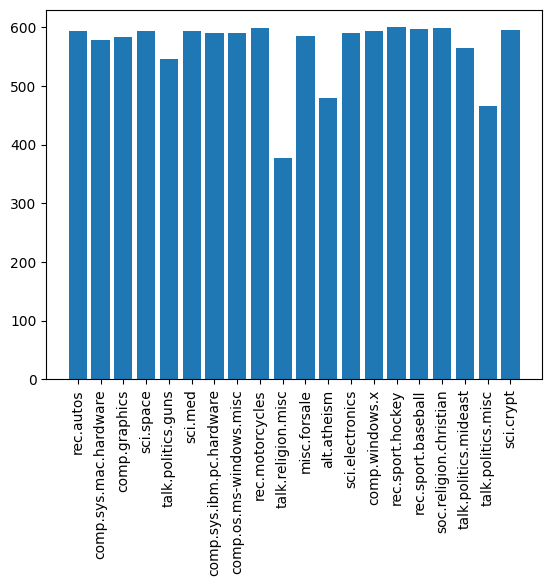

In [10]:
from collections import defaultdict
counts = defaultdict(lambda : 0)
for x in targets:
    name = target_names[x]
    counts[name] += 1

print(counts)
    
labels, freq = zip(*list(counts.items()))

plt.bar(x=labels, height=freq)
plt.xticks(rotation=90)


In [11]:
from sklearn.model_selection import train_test_split
train_docs, test_docs, train_targets, test_targets = train_test_split(documents, targets, random_state=65)

## First Classifier

I googled a bit for simple classifiers for this task, but the top hits all used deep-learning, which is fine but it's just too much of a can of worms for a 3 hour takehome challenge. Instead I opted to do something I'm sure is done by many as a decent baseline: use tfidf to vectorize all the documents, then use a standard classifier (in this case RandomForrest) on the vectors.

Note: We do not need to normalize the vectors using random forrest because it is a translation+scale invariant method.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler

clf = make_pipeline(
    TfidfVectorizer(stop_words='english', min_df=0.01),
    RandomForestClassifier(random_state=34, min_samples_leaf=40),
#    LogisticRegressionCV(Cs=20, max_iter=1000, random_state=12, tol=1e-3, solver='newton-cholesky')
)


In [14]:
clf.fit(train_docs, train_targets)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=0.01, stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=40, random_state=34))])

In [15]:
from sklearn.metrics import accuracy_score
train_predictions = clf.predict(train_docs)
train_acc = accuracy_score(train_targets, train_predictions)
print("train_accuracy", train_acc)

test_predictions = clf.predict(test_docs)
test_acc = accuracy_score(test_targets, test_predictions)
print("test_accuracy", test_acc)

train_accuracy 0.4893341190335887
test_accuracy 0.45705196182396607


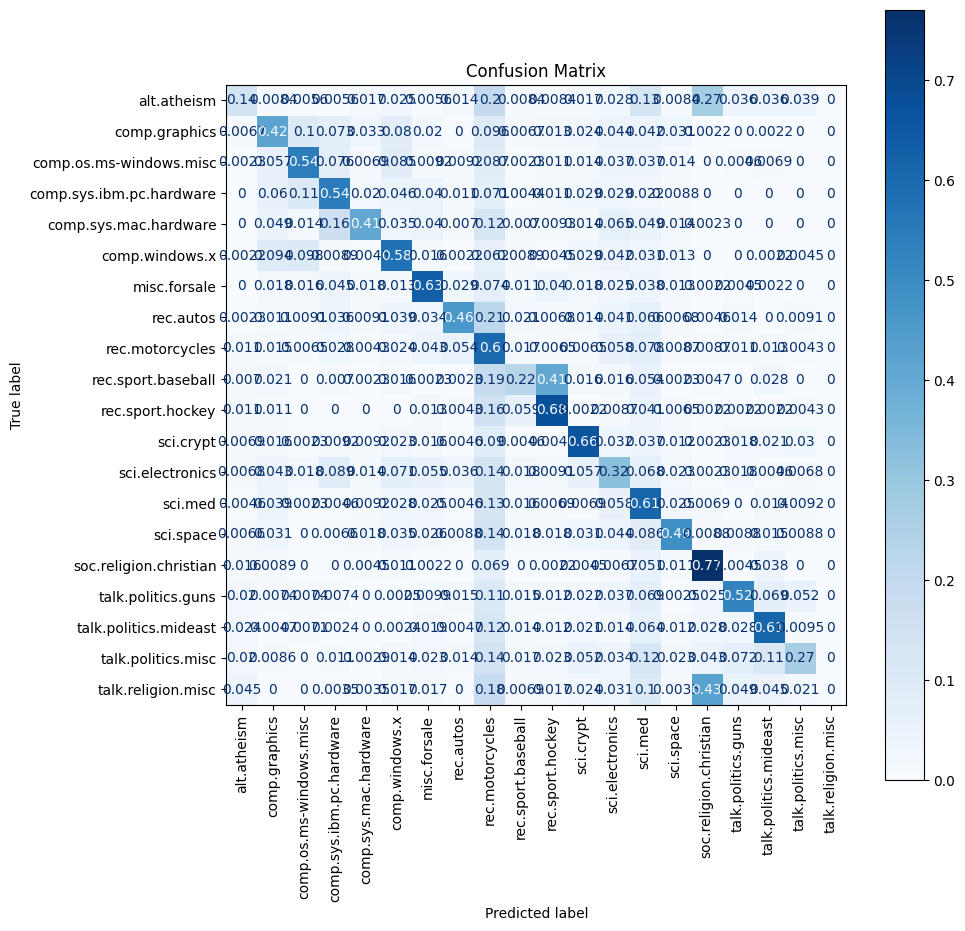

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay


# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    train_docs,
    train_targets,
    display_labels=target_names,
    cmap=plt.cm.Blues,
    normalize='true', 
)
disp.ax_.set_title('Confusion Matrix')
plt.xticks(rotation=90)

# print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Discussion of first classifier
It's not a total embarassment, an accuracy of %40 is not terrible given how many classes there are, but it does mean that it predicts the wrong glass most of the time.  I've not a super-deep dive, but there are some notable issues that can be gleaned directly from the confusion matrix.  Firstly, it seems to think a lot of documents are related to motocycles.  Secondly, it seems to often predict `soc.religion.christian` when it should predict `alt.atheism`.

# Second Classifier

It's very odd how `rec.motorcycles` were predicted so often.  I would expect a classifier to differentiate betwee `rec.[ANYTHING]` and `comp.[ANYTHING]`, but `rec.motorcycles` is just all over the place.

Secondly, it makes sense that `alt.atheism` and `soc.religion.christian` are often confused (defaulting to `soc.religion.christian`) becuase even though they are anti-thetical, they talk about one another, and TFIDF is not going to capture that valence very well.

These observations motivate the following strategy: The targets themselves have a tree structure that is not being exploited.  Perhaps simply predicting the top level (i.e. the prefix: `sci`/`comp`/...) would be an easier task.  Once we train a classifier on this sub-problem, we can then use the prediction as a feature which is input into second classifier to output the full class.

As a first step, we study how well we can predict the prefix of the targets using our Tfidf + RandomForrest architecture.

In [17]:
def index2prefix(target_idx: int) -> str:
    prefix = target_names[target_idx].split(".")[0]
    if prefix in ['alt', 'soc', 'misc']:
        return '???'
    return prefix

train_pfx = [index2prefix(_) for _ in train_targets]
test_pfx = [index2prefix(_) for _ in test_targets]

In [18]:
# Building prefix classifier
prefix_clf = make_pipeline(
    TfidfVectorizer(stop_words='english', min_df=0.001),
    RandomForestClassifier(random_state=34, min_samples_leaf=25),
)

In [19]:
prefix_clf.fit(train_docs, train_pfx)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=0.001, stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=25, random_state=34))])

In [20]:
train_predictions = prefix_clf.predict(train_docs)
train_acc = accuracy_score(train_pfx, train_predictions)
print("train_accuracy", train_acc)

test_predictions = prefix_clf.predict(test_docs)
test_acc = accuracy_score(test_pfx, test_predictions)
print("test_accuracy", test_acc)

train_accuracy 0.6939304655274013
test_accuracy 0.6620714033227288


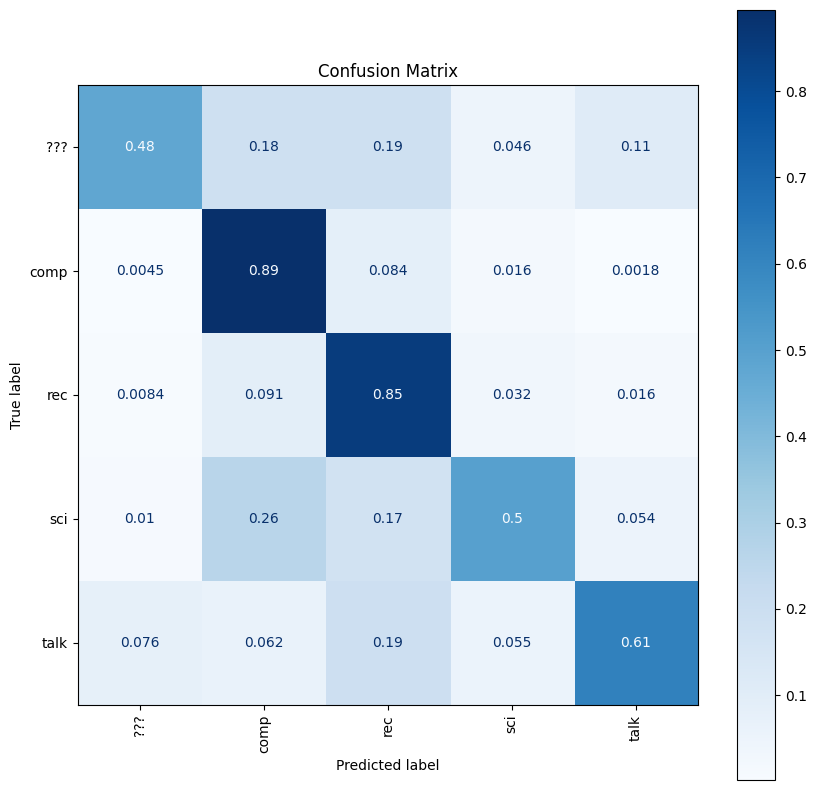

In [21]:
disp = ConfusionMatrixDisplay.from_estimator(
    prefix_clf,
    train_docs,
    train_pfx,
    #display_labels=target_names,
    cmap=plt.cm.Blues,
    normalize='true', 
)
disp.ax_.set_title('Confusion Matrix')
plt.xticks(rotation=90)

# print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [22]:
from collections import defaultdict
counts = defaultdict(lambda : 0)
for x in test_pfx:
    counts[x] += 1
    
print(counts)

defaultdict(<function <lambda> at 0x12e7464c0>, {'comp': 720, 'talk': 487, 'sci': 612, '???': 412, 'rec': 598})


## More thoughts
It seems to be common to mischaracterize a science document as a computer document or a recreational (but not vise-versa).

.... I'm going to plow ahead.  I was hoping to see better performance here.  The fact the we are not getting more than 90 percent accuracy here suggests to me that we should use the probabilities output by the random forest, as opposed to the predicted label.

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from scipy import sparse


class TwoTieredClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, param=1):
        self.param = param
        
    def fit(self, X, y):
        # X, y = check_X_y(X,y)
        self.classes_ = unique_labels(y)
        
        # first train the prefix predictor
        self.vectorizer = TfidfVectorizer(stop_words='english', min_df=0.001)
        self.prefix_clf = RandomForestClassifier(random_state=34, min_samples_leaf=25)
        vectors = self.vectorizer.fit_transform(X)
        y_pfx = [self._index2prefix(_) for _ in y]
        self.prefix_clf.fit(vectors, y)
        
        # now we train the another classifier to learn the actual class, using the output of the prefix_classifier as a feature
        prefix_probabilities = self.prefix_clf.predict_proba(vectors)
        
        X_augmented = sparse.hstack([vectors, prefix_probabilities])
        self.final_clf = RandomForestClassifier(random_state=34, min_samples_leaf=15)
        self.final_clf.fit(X_augmented, y)
        return self

    def predict(self, X):
        vectors = self.vectorizer.transform(X)
        prefix_probabilities = self.prefix_clf.predict_proba(vectors)
        X_augmented = sparse.hstack([vectors, prefix_probabilities])
        return self.final_clf.predict(X_augmented)
    
    @staticmethod
    def _index2prefix(target_idx: int) -> str:
        prefix = target_names[target_idx].split(".")[0]
        if prefix in ['alt', 'soc', 'misc']:
            return '???'
        return prefix
    

In [24]:
clf2 = TwoTieredClassifier()

In [25]:
clf2.fit(train_docs, train_targets)

TwoTieredClassifier()

In [26]:
train_predictions = clf2.predict(train_docs)
train_acc = accuracy_score(train_targets, train_predictions)
print("train_accuracy", train_acc)

test_predictions = clf2.predict(test_docs)
test_acc = accuracy_score(test_targets, test_predictions)
print("test_accuracy", test_acc)

train_accuracy 0.629345904537419
test_accuracy 0.5517850830682219


## Final Thoughts
The new feature (i.e. the prediction of a prefix-classifier) appears to have boosted accuracy from 0.45 to 0.55.  That's a 22% improvement.


### If this were part of the job
Things that are not done here that probably should be done in the context of a real project are

 - Consider other performance metrics.  In particular, precision and recall on each class.
     - This would allow for more in-depth feature engineering. For example, if we notice the classifier imprecise at detecting `talk.politics.relition` we could dive deeper into that subset of the data.
 - More data cleaning.  I didn't look at very many of the documents.  It's likely there are some special characters that mess with our tokenizer.
 - More insight into the vectorizer.  The TFIDF vectorizer is pretty friendly to use, and the `sklearn` implementation comes with an "analyzer" which allows you to get the meaning of a tfidf vector.  Sanity checking could have been done, but c'est la vie, there's no time.
 - Lastly, in the year 2023 it's basically illegal to not mention chat-GPT at some point.  There is an API-based vectorizer for chat-GPT2.  We could see if it improves upon the TFIDF vectorizer, but you'd need a API subscription to test that.